In [27]:
import h5py
import numpy as np
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../Netket/')
import analysis
from numpy import sqrt, pi, exp
from analysis import std_phase, ipr, pca_entropy, renyi_entropy, mean_amplitude, uniform_state_overlap, infidelity
# Directory containing the partial results
outfile = '../data/cluster_expansion_analysis/expansion_infidelities_merged.h5'

In [48]:
with h5py.File(outfile, 'r') as h5:
    infidels_exact_opt_mat = h5['infidels_exact_opt_mat'][:]
    infidels_RBM_opt_mat = h5['infidels_RBM_opt_mat'][:]
    compr_idx_list = h5['compr_idx_list'][:]
    idxs = h5['idxs'][:]

In [49]:
idxs

array([  1,   2,   5,   7,  10,  19,  38,  44,  45,  53,  60,  63,  68,
        69,  74,  80,  81,  89, 108, 117, 119, 122, 123, 125, 127, 129,
       138, 146, 174, 175, 176, 181, 182, 186, 189, 190, 197, 199, 201,
       203, 208, 213, 216, 217, 218, 219, 221, 230, 232, 239, 240, 245,
       246, 248, 250, 252, 253, 257, 269, 270, 272, 275, 277, 283, 288,
       289, 290, 295, 303, 311, 314, 324, 340, 342, 348, 350, 353, 367,
       373, 375, 386, 387, 397, 404, 405, 406, 407, 408, 410, 412, 413,
       424, 429, 438, 439, 442, 445, 447, 451, 453, 459, 466, 467, 473,
       474, 479, 481, 485, 488, 489, 503, 504, 513, 518, 521, 533, 534,
       542, 546, 560, 567, 570, 571, 575, 576, 577, 578, 579, 582, 584,
       586, 599, 609, 616, 617, 620, 627, 630, 634, 641, 649, 652, 664,
       668, 672, 678, 679, 682, 683, 685, 689, 691, 693, 706, 713, 714,
       717, 726, 728, 731, 734, 740, 741, 744, 747, 748, 750, 752, 753,
       758, 764, 778, 779, 786, 796, 798, 799, 801, 802, 803, 80

In [25]:

hypotheses = {
    "std_phase" : std_phase,
    "IPR" : ipr,
    "SPCA" : pca_entropy,
    "Renyi_2" : renyi_entropy,
    "uniform_state_overlap" : uniform_state_overlap,
    "mean_amplitude" : mean_amplitude,
}

data_root = '..'

h5_files_opt = [os.path.join(f"{data_root}/data/data_optimal_basis_rbm", f) for f in os.listdir(f'{data_root}/data/data_optimal_basis_rbm') if f.endswith('.h5')]
df_opt = analysis.load_outputs_to_dataframe(h5_files_opt, load_eigenstates=False)
df_opt = analysis.attach_hypotheses_fields(df_opt, hypotheses)
df_opt["idx"] = df_opt["file"].apply(lambda x: int(os.path.basename(x).split('_')[2]))
print(len(df_opt))

230


In [65]:
idxs_below_threshold = np.where(infidels_exact_opt_mat[:, 50] < 0.15)[0]
print(idxs_below_threshold)

[  0   1   6   8  13  14  16  19  21  26  27  34  35  39  48  49  51  52
  53  54  74  75  80  82  86  89  90  91  95  96 101 102 108 111 114 119
 120 124 131 140 141 143 148 149 152 155 157 166 171 177 183 188 194 196
 198 204 211 218 219 222 223 224 227]


In [55]:
def value_to_color(val, vmin, vmax, cmap='viridis'):
    """
    Map a value in [vmin, vmax] to a color using a matplotlib colormap.
    
    Args:
        val (float): The value to map.
        vmin (float): Minimum value of the range.
        vmax (float): Maximum value of the range.
        cmap (str or Colormap): Matplotlib colormap name or object.
        
    Returns:
        tuple: RGBA color tuple.
    """
    normed = (val - vmin) / (vmax - vmin)
    normed = min(max(normed, 0.0), 1.0)  # Clamp to [0, 1]
    cmap_obj = plt.get_cmap(cmap)
    return cmap_obj(normed)

In [79]:
std_phases_below = []
for idx in idxs_below_threshold:
    df_idx = idxs[idx]
    std_phase_val = abs(df_opt.loc[df_opt['idx'] == df_idx, 'std_phase'].values - sqrt(pi)/3)
    if len(std_phase_val) > 0:
        std_phases_below.append(std_phase_val[0])
    else:
        std_phases_below.append(np.nan)
std_phases_below = np.array(std_phases_below)
print(std_phases_below)

[0.49816014 0.4703044  0.39527071 0.21345352 0.31193641 0.05239037
 0.41137077 0.32341086 0.21925066 0.13535334 0.15263077 0.04277574
 0.35405708 0.21416288 0.03891512 0.32562703 0.42201437 0.12567193
 0.38018121 0.4098478  0.25036932 0.4951478  0.23750795 0.29250908
 0.11683823 0.40506289 0.23356522 0.41628128 0.03598189 0.28728127
 0.15216706 0.17763081 0.03248607 0.18147862 0.44803608 0.40452872
 0.45168304 0.14318965 0.13553475 0.35768683 0.45596476 1.2749409
 0.06214521 0.17149626 0.10251125 0.45502773 0.51710461 0.37973616
 0.26847029 0.09596394 0.10264874 0.41448897 0.23906644 0.24248107
 0.09578925 0.0345603  0.43498569 0.01938443 0.17267702 0.2452535
 0.21308403 0.00397598 1.08063173]


/tmp/ipykernel_2915760/4135164953.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.97, 1])


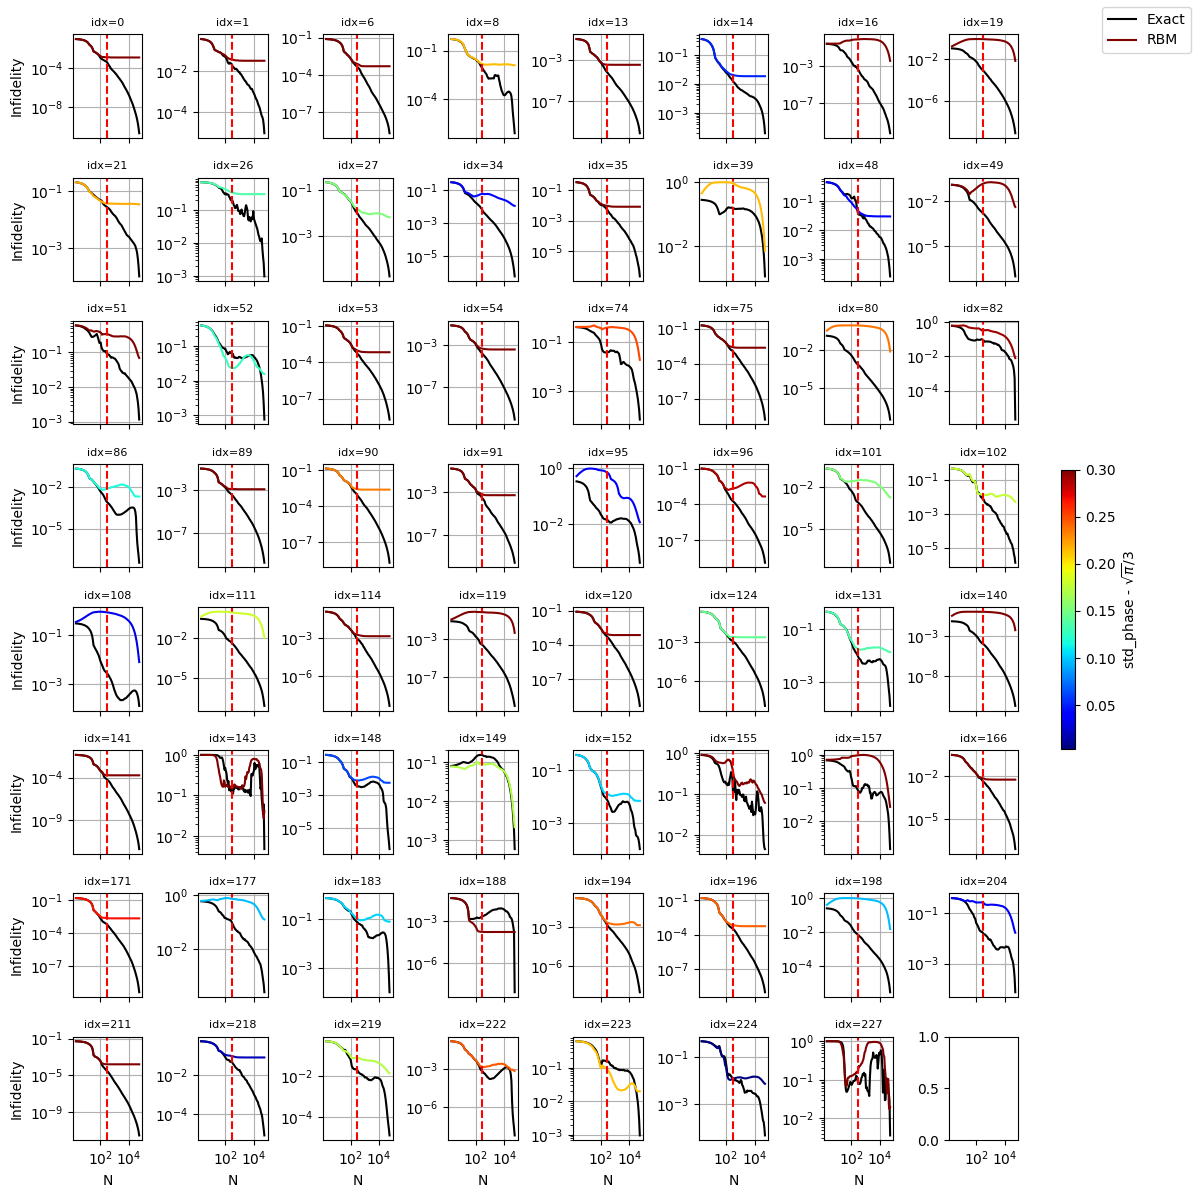

In [83]:
from matplotlib.cm import ScalarMappable

# fig, axes = plt.subplots(8, 8, figsize=(12, 12), sharex=True, sharey=True)
fig, axes = plt.subplots(8, 8, figsize=(12, 12), sharex=True, sharey=False)
extrema_std_normality = np.min(std_phases_below), np.max(std_phases_below)
extrema_std_normality = np.min(std_phases_below), 0.3
for i in range(8):
    for j in range(8):
        idxij = i * 8 + j
        if idxij >= len(idxs_below_threshold):
            continue
        idx = idxs_below_threshold[idxij] 
        if idx < infidels_exact_opt_mat.shape[0]:
            try:
                ax = axes[i, j]
                ax.plot(compr_idx_list[0:-2], infidels_exact_opt_mat[idx][0:-2], label='Exact',color = "black")
                # std_normality = df_opt.loc[df_opt['idx'] == idx, 'std_phase'].values - sqrt(pi)/3
                std_normality = std_phases_below[idxij]
                color = value_to_color(std_normality, extrema_std_normality[0], extrema_std_normality[1], cmap='jet')
                ax.plot(compr_idx_list[0:-2], infidels_RBM_opt_mat[idx][0:-2], label='RBM', color = color)
                ax.set_xscale('log')
                ax.set_yscale('log')
                ax.axvline(x=16**2+16*2, color='red', linestyle='--')
                ax.set_title(f'idx={idx}',fontsize=8)
                ax.grid(True)
                if i == 7:
                    ax.set_xlabel('N')
                if j == 0:
                    ax.set_ylabel('Infidelity')
            except Exception as e:
                print(f"Error plotting idx={idx}: {e}")
                axes[i, j].axis('off')
        else:
            axes[i, j].axis('off')
            
            # Add a colorbar for std_normality

sm = ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=extrema_std_normality[0], vmax=extrema_std_normality[1]))
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.015, pad=-0.15)
cbar.set_label('std_phase - $\\sqrt{\\pi}/3$')
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout(rect=[0, 0, 0.97, 1])
plt.show()

In [7]:
idx_above_threshold = np.where(infidels_exact_opt_mat[:, 50] >= 0.15)[0]
len(idx_above_threshold)

167

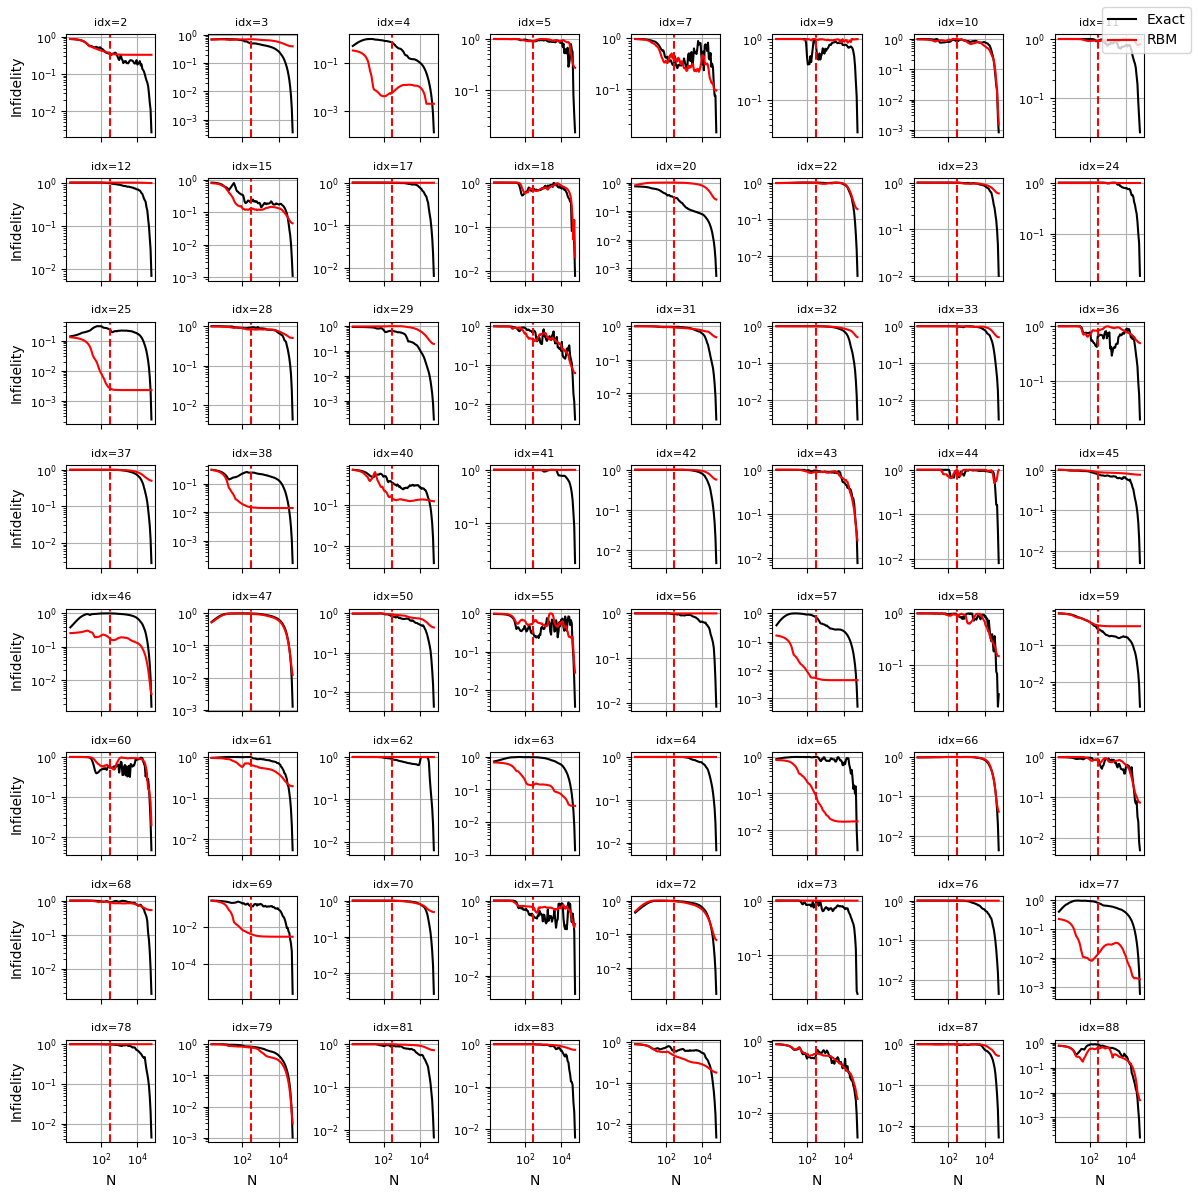

In [21]:
# fig, axes = plt.subplots(8, 8, figsize=(12, 12), sharex=True, sharey=True)
fig, axes = plt.subplots(8, 8, figsize=(12, 12), sharex=True, sharey=False)
for i in range(8):
    for j in range(8):
        idxij = i * 8 + j
        if idxij >= len(idx_above_threshold):
            continue
        idx = idx_above_threshold[idxij] 
        if idx < infidels_exact_opt_mat.shape[0]:
            ax = axes[i, j]
            ax.tick_params(axis='both', which='major', labelsize=8)
            ax.plot(compr_idx_list[0:-1], infidels_exact_opt_mat[idx][0:-1], label='Exact',color = "black")
            ax.plot(compr_idx_list[0:-1], infidels_RBM_opt_mat[idx][0:-1], label='RBM', color = "red")
            # ax.plot(compr_idx_list[0:-1], np.abs(infidels_exact_opt_mat[idx][0:-1] - infidels_RBM_opt_mat[idx][0:-1]), label='RBM', color = "red")
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.axvline(x=16**2+16*2, color='red', linestyle='--')
            ax.set_title(f'idx={idx}',fontsize=8)
            ax.grid(True)
            if i == 7:
                ax.set_xlabel('N')
            if j == 0:
                ax.set_ylabel('Infidelity')
        else:
            axes[i, j].axis('off')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout(rect=[0, 0, 0.97, 1])
plt.show()

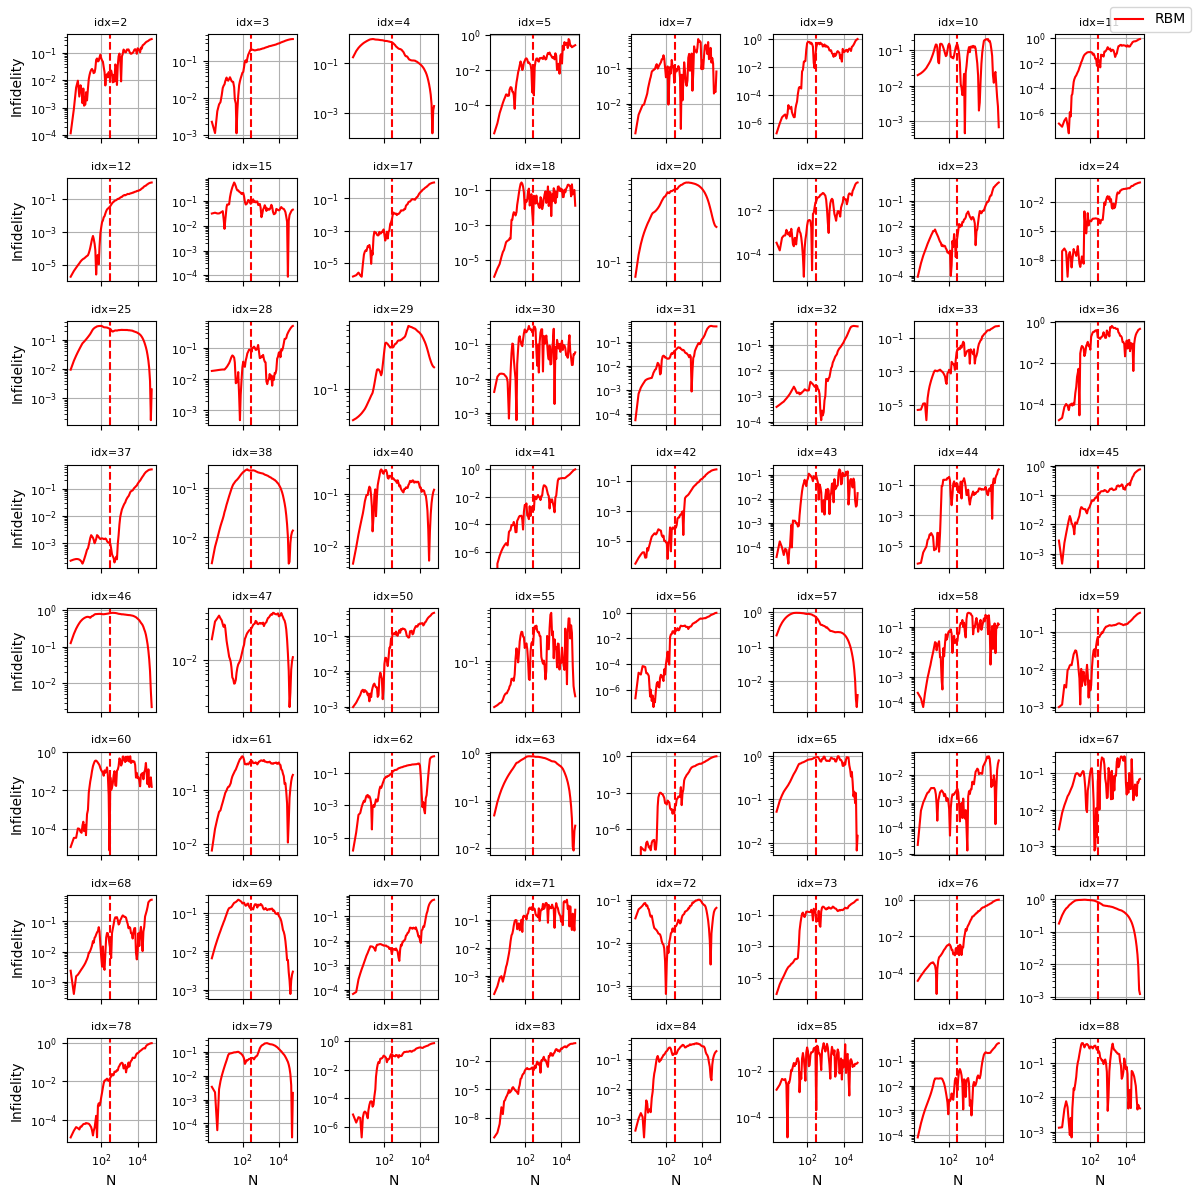

In [20]:
# fig, axes = plt.subplots(8, 8, figsize=(12, 12), sharex=True, sharey=True)
fig, axes = plt.subplots(8, 8, figsize=(12, 12), sharex=True, sharey=False)
for i in range(8):
    for j in range(8):
        idxij = i * 8 + j
        if idxij >= len(idx_above_threshold):
            continue
        idx = idx_above_threshold[idxij] 
        if idx < infidels_exact_opt_mat.shape[0]:
            ax = axes[i, j]
            ax.tick_params(axis='both', which='major', labelsize=8)
            # ax.plot(compr_idx_list[0:-1], infidels_exact_opt_mat[idx][0:-1], label='Exact',color = "black")
            # ax.plot(compr_idx_list[0:-1], infidels_RBM_opt_mat[idx][0:-1], label='RBM', color = "red")
            ax.plot(compr_idx_list[0:-1], np.abs(infidels_exact_opt_mat[idx][0:-1] - infidels_RBM_opt_mat[idx][0:-1]), label='RBM', color = "red")
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.axvline(x=16**2+16*2, color='red', linestyle='--')
            ax.set_title(f'idx={idx}',fontsize=8)
            ax.grid(True)
            if i == 7:
                ax.set_xlabel('N')
            if j == 0:
                ax.set_ylabel('Infidelity')
        else:
            axes[i, j].axis('off')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout(rect=[0, 0, 0.97, 1])
plt.show()

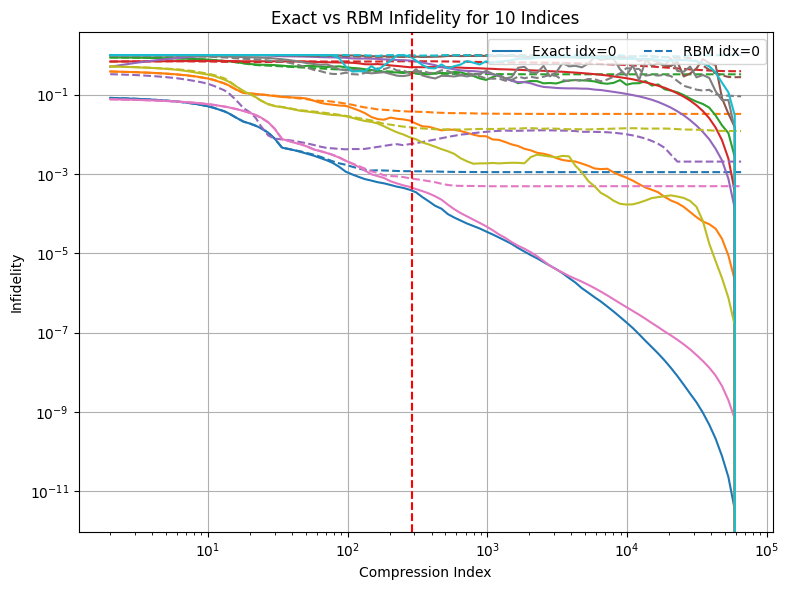

In [ ]:
plt.figure(figsize=(8, 6))
colors = plt.cm.tab10.colors

for idx in range(10):
    color = colors[idx % len(colors)]
    plt.plot(compr_idx_list, infidels_exact_opt_mat[idx], linestyle='-', color=color, label=f'Exact idx={idx}' if idx == 0 else "")
    plt.plot(compr_idx_list, infidels_RBM_opt_mat[idx], linestyle='--', color=color, label=f'RBM idx={idx}' if idx == 0 else "")

plt.xscale('log')
plt.yscale('log')
plt.axvline(x=16**2+16*2, color='red', linestyle='--')
plt.xlabel('Compression Index')
plt.ylabel('Infidelity')
plt.title('Exact vs RBM Infidelity for 10 Indices')
plt.grid(True)
# Only show legend for the first pair to avoid clutter
plt.legend(loc='upper right', ncol=2)
plt.tight_layout()
plt.show()